<a href="https://colab.research.google.com/github/Peckkie/Evaluation_Model_Prediction/blob/main/Evaluation15AB_eachCase_TestSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/USAI/Testdf_15ABrf.csv')
df

,Unnamed: 0,Case,Abs Position,Sub Position,Class,Sub_class,Path Full,Path Crop,Views,fold,tagName,originalImage,left,top,width,height,Rleft,Rtop,Rwidth,Rheight,filename,15AB_category,15AB_Prob,15AB_ProbAll,Predict_15AB
0,0,40,P1,P1,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-A,2,MildFattyLiver,https://irisprodseatraining.blob.core.windows....,86.0,133.0,477.0,311.0,0.092664,0.148873,0.513514,0.346614,AB01 P1 C040.JPG,Normal,0.413035,"[0.21054949660106018, 0.15272910155885105, 0.0...",Incorrect
1,1,40,P2,P2,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-A,2,MildFattyLiver,https://irisprodseatraining.blob.core.windows....,163.0,139.0,532.0,385.0,0.171698,0.154849,0.560377,0.428287,AB01 P2 C040.JPG,AB01,0.741650,"[0.741650235419515, 0.07765986354655634, 0.003...",Correct
2,2,40,P4,P41,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-B,2,MildFattyLiver,https://irisprodseatraining.blob.core.windows....,127.0,135.0,605.0,640.0,0.140316,0.150865,0.667984,0.711155,AB01 P4-1 C040.JPG,AB02,0.432403,"[0.34931351731971466, 0.43240273685662617, 0.0...",Incorrect
3,3,40,P5,P51,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-C,2,MildFattyLiver,https://irisprodseatraining.blob.core.windows....,59.0,96.0,643.0,587.0,0.063462,0.107041,0.690385,0.653386,AB01 P5-1 C040.JPG,AB01,0.345768,"[0.3457682703694028, 0.1947838428977293, 0.021...",Correct
4,4,40,P3,P31,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-B,2,MildFattyLiver,https://irisprodseatraining.blob.core.windows....,199.0,132.0,618.0,562.0,0.216374,0.146881,0.672515,0.625498,AB01 P3-1 C040.JPG,AB02,0.540886,"[0.15631073449826405, 0.5408859454791868, 0.02...",Incorrect
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,1307,350,P3,P32,Normal,Normal,/media/tohn/HDD/VISION_dataset/USAI/US images ...,/media/tohn/HDD/VISION_dataset/USAI/US images ...,FP-B,2,Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P3-2.Case 350.JPG,Normal,1.000000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Correct
1308,1308,350,P4,P42,Normal,Normal,/media/tohn/HDD/VISION_dataset/USAI/US images ...,/media/tohn/HDD/VISION_dataset/USAI/US images ...,FP-B,2,Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P4-2.Case 350.JPG,Normal,0.515819,"[0.009881218128407877, 0.045751745997430156, 0...",Correct
1309,1309,350,P5,P52,Normal,Normal,/media/tohn/HDD/VISION_dataset/USAI/US images ...,/media/tohn/HDD/VISION_dataset/USAI/US images ...,FP-C,2,Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P5-2.Case 350.JPG,Normal,0.995000,"[0.0, 0.0, 0.0, 0.0025, 0.0, 0.0025, 0.0, 0.0,...",Correct
1310,1310,350,P6,P61,Normal,Normal,/media/tohn/HDD/VISION_dataset/USAI/US images ...,/media/tohn/HDD/VISION_dataset/USAI/US images ...,FP-C,2,Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P6.Case 350.JPG,Normal,0.906968,"[0.01259891597164684, 0.006560858517853674, 0....",Correct


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1312 entries, 0 to 1311
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1312 non-null   int64  
 1   Case           1312 non-null   int64  
 2   Abs Position   1312 non-null   object 
 3   Sub Position   1312 non-null   object 
 4   Class          1312 non-null   object 
 5   Sub_class      1312 non-null   object 
 6   Path Full      1312 non-null   object 
 7   Path Crop      1312 non-null   object 
 8   Views          1312 non-null   object 
 9   fold           1312 non-null   int64  
 10  tagName        1312 non-null   object 
 11  originalImage  455 non-null    object 
 12  left           455 non-null    float64
 13  top            455 non-null    float64
 14  width          455 non-null    float64
 15  height         455 non-null    float64
 16  Rleft          455 non-null    float64
 17  Rtop           455 non-null    float64
 18  Rwidth  

In [ ]:
AI_pred = []

for i in range(len(df)) :
    if df['15AB_category'][i] == 'Normal':
        p = 'Normal'
        AI_pred.append(p)
    else :
        p = 'Abnormal'
        AI_pred.append(p)

In [ ]:
print(len(AI_pred))
AI_pred

In [ ]:
df['AN_category'] = AI_pred
df

,Unnamed: 0,Case,Abs Position,Sub Position,Class,Sub_class,Path Full,Path Crop,Views,fold,tagName,originalImage,left,top,width,height,Rleft,Rtop,Rwidth,Rheight,filename,15AB_category,15AB_Prob,15AB_ProbAll,Predict_15AB,AN_category
0,0,40,P1,P1,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-A,2,MildFattyLiver,https://irisprodseatraining.blob.core.windows....,86.0,133.0,477.0,311.0,0.092664,0.148873,0.513514,0.346614,AB01 P1 C040.JPG,Normal,0.413035,"[0.21054949660106018, 0.15272910155885105, 0.0...",Incorrect,Normal
1,1,40,P2,P2,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-A,2,MildFattyLiver,https://irisprodseatraining.blob.core.windows....,163.0,139.0,532.0,385.0,0.171698,0.154849,0.560377,0.428287,AB01 P2 C040.JPG,AB01,0.741650,"[0.741650235419515, 0.07765986354655634, 0.003...",Correct,Abnormal
2,2,40,P4,P41,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-B,2,MildFattyLiver,https://irisprodseatraining.blob.core.windows....,127.0,135.0,605.0,640.0,0.140316,0.150865,0.667984,0.711155,AB01 P4-1 C040.JPG,AB02,0.432403,"[0.34931351731971466, 0.43240273685662617, 0.0...",Incorrect,Abnormal
3,3,40,P5,P51,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-C,2,MildFattyLiver,https://irisprodseatraining.blob.core.windows....,59.0,96.0,643.0,587.0,0.063462,0.107041,0.690385,0.653386,AB01 P5-1 C040.JPG,AB01,0.345768,"[0.3457682703694028, 0.1947838428977293, 0.021...",Correct,Abnormal
4,4,40,P3,P31,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-B,2,MildFattyLiver,https://irisprodseatraining.blob.core.windows....,199.0,132.0,618.0,562.0,0.216374,0.146881,0.672515,0.625498,AB01 P3-1 C040.JPG,AB02,0.540886,"[0.15631073449826405, 0.5408859454791868, 0.02...",Incorrect,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,1307,350,P3,P32,Normal,Normal,/media/tohn/HDD/VISION_dataset/USAI/US images ...,/media/tohn/HDD/VISION_dataset/USAI/US images ...,FP-B,2,Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P3-2.Case 350.JPG,Normal,1.000000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Correct,Normal
1308,1308,350,P4,P42,Normal,Normal,/media/tohn/HDD/VISION_dataset/USAI/US images ...,/media/tohn/HDD/VISION_dataset/USAI/US images ...,FP-B,2,Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P4-2.Case 350.JPG,Normal,0.515819,"[0.009881218128407877, 0.045751745997430156, 0...",Correct,Normal
1309,1309,350,P5,P52,Normal,Normal,/media/tohn/HDD/VISION_dataset/USAI/US images ...,/media/tohn/HDD/VISION_dataset/USAI/US images ...,FP-C,2,Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P5-2.Case 350.JPG,Normal,0.995000,"[0.0, 0.0, 0.0, 0.0025, 0.0, 0.0025, 0.0, 0.0,...",Correct,Normal
1310,1310,350,P6,P61,Normal,Normal,/media/tohn/HDD/VISION_dataset/USAI/US images ...,/media/tohn/HDD/VISION_dataset/USAI/US images ...,FP-C,2,Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P6.Case 350.JPG,Normal,0.906968,"[0.01259891597164684, 0.006560858517853674, 0....",Correct,Normal


In [ ]:
df.groupby(['Case', 'AN_category']).count()

Unnamed: 0  Abs Position  ...  15AB_ProbAll  Predict_15AB
Case AN_category                            ...                            
1    Abnormal             22            22  ...            22            22
     Normal               27            27  ...            27            27
2    Abnormal             22            22  ...            22            22
     Normal               24            24  ...            24            24
3    Normal               12            12  ...            12            12
...                      ...           ...  ...           ...           ...
440  Abnormal              1             1  ...             1             1
441  Abnormal              1             1  ...             1             1
442  Abnormal              1             1  ...             1             1
443  Abnormal              1             1  ...             1             1
458  Abnormal              1             1  ...             1             1

[178 rows x 24 columns]

In [ ]:
df_g = df.groupby('Case').count()
df_g

,Unnamed: 0,Abs Position,Sub Position,Class,Sub_class,Path Full,Path Crop,Views,fold,tagName,originalImage,left,top,width,height,Rleft,Rtop,Rwidth,Rheight,filename,15AB_category,15AB_Prob,15AB_ProbAll,Predict_15AB,AN_category
Case,,,,,,,,,,,,,,,,,,,,,,,,,
1,49,49,49,49,49,49,49,49,49,49,36,36,36,36,36,36,36,36,36,49,49,49,49,49,49
2,46,46,46,46,46,46,46,46,46,46,34,34,34,34,34,34,34,34,34,46,46,46,46,46,46
3,12,12,12,12,12,12,12,12,12,12,0,0,0,0,0,0,0,0,0,12,12,12,12,12,12
4,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26
7,13,13,13,13,13,13,13,13,13,13,0,0,0,0,0,0,0,0,0,13,13,13,13,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
441,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
442,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
df_g_re = df_g.reset_index(level=['Case'])
df_g_re

,Case,Unnamed: 0,Abs Position,Sub Position,Class,Sub_class,Path Full,Path Crop,Views,fold,tagName,originalImage,left,top,width,height,Rleft,Rtop,Rwidth,Rheight,filename,15AB_category,15AB_Prob,15AB_ProbAll,Predict_15AB,AN_category
0,1,49,49,49,49,49,49,49,49,49,49,36,36,36,36,36,36,36,36,36,49,49,49,49,49,49
1,2,46,46,46,46,46,46,46,46,46,46,34,34,34,34,34,34,34,34,34,46,46,46,46,46,46
2,3,12,12,12,12,12,12,12,12,12,12,0,0,0,0,0,0,0,0,0,12,12,12,12,12,12
3,4,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26
4,7,13,13,13,13,13,13,13,13,13,13,0,0,0,0,0,0,0,0,0,13,13,13,13,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,440,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
140,441,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
141,442,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
142,443,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
list_case = df_g_re['Case'].tolist()
print(len(list_case))
list_case

In [ ]:
col_name_all = []
for col in df.columns:
    col_name = col
    col_name_all.append(col_name)
col_name_all

['Unnamed: 0',
 'Case',
 'Abs Position',
 'Sub Position',
 'Class',
 'Sub_class',
 'Path Full',
 'Path Crop',
 'Views',
 'fold',
 'tagName',
 'originalImage',
 'left',
 'top',
 'width',
 'height',
 'Rleft',
 'Rtop',
 'Rwidth',
 'Rheight',
 'filename',
 '15AB_category',
 '15AB_Prob',
 '15AB_ProbAll',
 'Predict_15AB',
 'AN_category']

In [ ]:
df_case_change = pd.DataFrame(columns = col_name_all)
df_case_change['AN_tranf'] = ''
df_case_change

,Unnamed: 0,Case,Abs Position,Sub Position,Class,Sub_class,Path Full,Path Crop,Views,fold,tagName,originalImage,left,top,width,height,Rleft,Rtop,Rwidth,Rheight,filename,15AB_category,15AB_Prob,15AB_ProbAll,Predict_15AB,AN_category,AN_tranf


In [ ]:
for j in list_case :
    c1 = df[(df['Case'] == j)].reset_index(drop=True)
    for i in range(len(c1)):
        if c1['AN_category'][i] == 'Abnormal':
           c1['AN_tranf'] = 'Abnormal'
    df_case_change = df_case_change.append(c1).reset_index(drop=True)
       # else :
        #  c1['Class_tranf'] = c1['Class'][i]
    #df_case_change = df_case_change.append(c1).reset_index(drop=True)

In [ ]:
df_case_change

,Unnamed: 0,Case,Abs Position,Sub Position,Class,Sub_class,Path Full,Path Crop,Views,fold,tagName,originalImage,left,top,width,height,Rleft,Rtop,Rwidth,Rheight,filename,15AB_category,15AB_Prob,15AB_ProbAll,Predict_15AB,AN_category,AN_tranf
0,179,1,P3,P31,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-B,1,MildFattyLiver,https://irisprodseatraining.blob.core.windows....,172.0,164.0,668.0,690.0,0.174545,0.182738,0.678182,0.766932,AB01 P3-1 C001.JPG,AB02,0.359092,"[0.13726175111213354, 0.35909154439248625, 0.0...",Incorrect,Abnormal,Abnormal
1,180,1,P1,P1,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-A,1,MildFattyLiver,https://irisprodseatraining.blob.core.windows....,276.0,110.0,548.0,568.0,0.271127,0.122977,0.538732,0.631474,AB01 P1 C001.JPG,AB01,0.578499,"[0.5784991266323931, 0.11014928806051129, 0.02...",Correct,Abnormal,Abnormal
2,181,1,P4,P42,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-B,1,MildFattyLiver,https://irisprodseatraining.blob.core.windows....,107.0,142.0,664.0,607.0,0.118812,0.158833,0.734653,0.675299,AB01 P4-2 C001.JPG,AB02,0.477486,"[0.30032594270981683, 0.4774861632331568, 0.01...",Incorrect,Abnormal,Abnormal
3,182,1,P5,P51,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-C,1,MildFattyLiver,https://irisprodseatraining.blob.core.windows....,259.0,167.0,535.0,691.0,0.258929,0.186722,0.533929,0.768924,AB01 P5-1 C001.JPG,AB02,0.170386,"[0.08287421697252638, 0.17038606122397698, 0.0...",Incorrect,Abnormal,Abnormal
4,183,1,P2,P2,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-A,1,MildFattyLiver,https://irisprodseatraining.blob.core.windows....,260.0,175.0,428.0,401.0,0.261733,0.194690,0.431408,0.446215,AB01 P2 C001.JPG,Normal,0.806577,"[0.06017623843373501, 0.02112012397389805, 0.0...",Incorrect,Normal,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,445,440,P7,P72,Abnormal,AB12,/media/tohn/HDD/VISION_dataset/USAI/FPD JULY 2...,/media/tohn/HDD/VISION_dataset/USAI/FPD JULY 2...,FP-D,2,Hydronephrosis,https://irisprodseatraining.blob.core.windows....,147.0,144.0,536.0,437.0,0.145390,0.160825,0.530142,0.486056,FP D P7-2 Case 282.JPG.png,AB12,0.939815,"[0.0002704865817697852, 0.000494429976593287, ...",Correct,Abnormal,Abnormal
1308,432,441,P7,P72,Abnormal,AB12,/media/tohn/HDD/VISION_dataset/USAI/FPD JULY 2...,/media/tohn/HDD/VISION_dataset/USAI/FPD JULY 2...,FP-D,1,Renalstones,https://irisprodseatraining.blob.core.windows....,68.0,187.0,593.0,435.0,0.070896,0.208634,0.617537,0.484064,FP D P7-2 Case 283.JPG.png,AB12,0.638772,"[0.01412703917046602, 0.007788421500840064, 0....",Correct,Abnormal,Abnormal
1309,448,442,P7,P72,Abnormal,AB12,/media/tohn/HDD/VISION_dataset/USAI/FPD JULY 2...,/media/tohn/HDD/VISION_dataset/USAI/FPD JULY 2...,FP-D,1,RenalstonesHydronephrosis,https://irisprodseatraining.blob.core.windows....,249.0,160.0,531.0,392.0,0.252727,0.178754,0.538182,0.436255,FP D P7-2 Case 284.JPG.png,AB12,0.989963,"[0.005, 0.0, 0.0, 1.3737627272469441e-05, 6.23...",Correct,Abnormal,Abnormal
1310,443,443,P7,P72,Abnormal,AB12,/media/tohn/HDD/VISION_dataset/USAI/FPD JULY 2...,/media/tohn/HDD/VISION_dataset/USAI/FPD JULY 2...,FP-D,2,Hydronephrosis,https://irisprodseatraining.blob.core.windows....,53.0,105.0,748.0,510.0,0.056391,0.117001,0.783835,0.567729,FP D P7-2 Case 285.JPG.png,AB12,0.928599,"[8.37742504409171e-05, 0.0026162644273397756, ...",Correct,Abnormal,Abnormal


In [ ]:
df_case_change["AN_tranf"].fillna("Normal", inplace = True)

In [ ]:
df_case_change.groupby(['Case', 'AN_tranf']).count()

,,Unnamed: 0,Abs Position,Sub Position,Class,Sub_class,Path Full,Path Crop,Views,fold,tagName,originalImage,left,top,width,height,Rleft,Rtop,Rwidth,Rheight,filename,15AB_category,15AB_Prob,15AB_ProbAll,Predict_15AB,AN_category
Case,AN_tranf,,,,,,,,,,,,,,,,,,,,,,,,,
1,Abnormal,49,49,49,49,49,49,49,49,49,49,36,36,36,36,36,36,36,36,36,49,49,49,49,49,49
2,Abnormal,46,46,46,46,46,46,46,46,46,46,34,34,34,34,34,34,34,34,34,46,46,46,46,46,46
3,Normal,12,12,12,12,12,12,12,12,12,12,0,0,0,0,0,0,0,0,0,12,12,12,12,12,12
4,Abnormal,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26
7,Normal,13,13,13,13,13,13,13,13,13,13,0,0,0,0,0,0,0,0,0,13,13,13,13,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,Abnormal,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
441,Abnormal,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
442,Abnormal,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
 pd.isnull(df_case_change["AN_tranf"]) 

0       False
1       False
2       False
3       False
4       False
        ...  
1307    False
1308    False
1309    False
1310    False
1311    False
Name: AN_tranf, Length: 1312, dtype: bool

In [ ]:
#####actul

In [ ]:
df_case_acc = pd.DataFrame(columns = col_name_all)
df_case_acc['Class_tranf'] = ''
df_case_acc

,Unnamed: 0,Case,Abs Position,Sub Position,Class,Sub_class,Path Full,Path Crop,Views,fold,tagName,originalImage,left,top,width,height,Rleft,Rtop,Rwidth,Rheight,filename,15AB_category,15AB_Prob,15AB_ProbAll,Predict_15AB,AN_category,Class_tranf


In [ ]:
for j in list_case :
    c1 = df[(df['Case'] == j)].reset_index(drop=True)
    for i in range(len(c1)):
        if c1['Class'][i] == 'Abnormal':
           c1['Class_tranf'] = 'Abnormal'
    df_case_acc = df_case_acc.append(c1).reset_index(drop=True)

In [ ]:
df_case_acc["Class_tranf"].fillna("Normal", inplace = True)
df_case_acc

,Unnamed: 0,Case,Abs Position,Sub Position,Class,Sub_class,Path Full,Path Crop,Views,fold,tagName,originalImage,left,top,width,height,Rleft,Rtop,Rwidth,Rheight,filename,15AB_category,15AB_Prob,15AB_ProbAll,Predict_15AB,AN_category,Class_tranf
0,179,1,P3,P31,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-B,1,MildFattyLiver,https://irisprodseatraining.blob.core.windows....,172.0,164.0,668.0,690.0,0.174545,0.182738,0.678182,0.766932,AB01 P3-1 C001.JPG,AB02,0.359092,"[0.13726175111213354, 0.35909154439248625, 0.0...",Incorrect,Abnormal,Abnormal
1,180,1,P1,P1,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-A,1,MildFattyLiver,https://irisprodseatraining.blob.core.windows....,276.0,110.0,548.0,568.0,0.271127,0.122977,0.538732,0.631474,AB01 P1 C001.JPG,AB01,0.578499,"[0.5784991266323931, 0.11014928806051129, 0.02...",Correct,Abnormal,Abnormal
2,181,1,P4,P42,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-B,1,MildFattyLiver,https://irisprodseatraining.blob.core.windows....,107.0,142.0,664.0,607.0,0.118812,0.158833,0.734653,0.675299,AB01 P4-2 C001.JPG,AB02,0.477486,"[0.30032594270981683, 0.4774861632331568, 0.01...",Incorrect,Abnormal,Abnormal
3,182,1,P5,P51,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-C,1,MildFattyLiver,https://irisprodseatraining.blob.core.windows....,259.0,167.0,535.0,691.0,0.258929,0.186722,0.533929,0.768924,AB01 P5-1 C001.JPG,AB02,0.170386,"[0.08287421697252638, 0.17038606122397698, 0.0...",Incorrect,Abnormal,Abnormal
4,183,1,P2,P2,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-A,1,MildFattyLiver,https://irisprodseatraining.blob.core.windows....,260.0,175.0,428.0,401.0,0.261733,0.194690,0.431408,0.446215,AB01 P2 C001.JPG,Normal,0.806577,"[0.06017623843373501, 0.02112012397389805, 0.0...",Incorrect,Normal,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,445,440,P7,P72,Abnormal,AB12,/media/tohn/HDD/VISION_dataset/USAI/FPD JULY 2...,/media/tohn/HDD/VISION_dataset/USAI/FPD JULY 2...,FP-D,2,Hydronephrosis,https://irisprodseatraining.blob.core.windows....,147.0,144.0,536.0,437.0,0.145390,0.160825,0.530142,0.486056,FP D P7-2 Case 282.JPG.png,AB12,0.939815,"[0.0002704865817697852, 0.000494429976593287, ...",Correct,Abnormal,Abnormal
1308,432,441,P7,P72,Abnormal,AB12,/media/tohn/HDD/VISION_dataset/USAI/FPD JULY 2...,/media/tohn/HDD/VISION_dataset/USAI/FPD JULY 2...,FP-D,1,Renalstones,https://irisprodseatraining.blob.core.windows....,68.0,187.0,593.0,435.0,0.070896,0.208634,0.617537,0.484064,FP D P7-2 Case 283.JPG.png,AB12,0.638772,"[0.01412703917046602, 0.007788421500840064, 0....",Correct,Abnormal,Abnormal
1309,448,442,P7,P72,Abnormal,AB12,/media/tohn/HDD/VISION_dataset/USAI/FPD JULY 2...,/media/tohn/HDD/VISION_dataset/USAI/FPD JULY 2...,FP-D,1,RenalstonesHydronephrosis,https://irisprodseatraining.blob.core.windows....,249.0,160.0,531.0,392.0,0.252727,0.178754,0.538182,0.436255,FP D P7-2 Case 284.JPG.png,AB12,0.989963,"[0.005, 0.0, 0.0, 1.3737627272469441e-05, 6.23...",Correct,Abnormal,Abnormal
1310,443,443,P7,P72,Abnormal,AB12,/media/tohn/HDD/VISION_dataset/USAI/FPD JULY 2...,/media/tohn/HDD/VISION_dataset/USAI/FPD JULY 2...,FP-D,2,Hydronephrosis,https://irisprodseatraining.blob.core.windows....,53.0,105.0,748.0,510.0,0.056391,0.117001,0.783835,0.567729,FP D P7-2 Case 285.JPG.png,AB12,0.928599,"[8.37742504409171e-05, 0.0026162644273397756, ...",Correct,Abnormal,Abnormal


In [ ]:
df_case_acc.groupby(['Case', 'Class_tranf']).count()

,,Unnamed: 0,Abs Position,Sub Position,Class,Sub_class,Path Full,Path Crop,Views,fold,tagName,originalImage,left,top,width,height,Rleft,Rtop,Rwidth,Rheight,filename,15AB_category,15AB_Prob,15AB_ProbAll,Predict_15AB,AN_category
Case,Class_tranf,,,,,,,,,,,,,,,,,,,,,,,,,
1,Abnormal,49,49,49,49,49,49,49,49,49,49,36,36,36,36,36,36,36,36,36,49,49,49,49,49,49
2,Abnormal,46,46,46,46,46,46,46,46,46,46,34,34,34,34,34,34,34,34,34,46,46,46,46,46,46
3,Normal,12,12,12,12,12,12,12,12,12,12,0,0,0,0,0,0,0,0,0,12,12,12,12,12,12
4,Abnormal,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26
7,Normal,13,13,13,13,13,13,13,13,13,13,0,0,0,0,0,0,0,0,0,13,13,13,13,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,Abnormal,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
441,Abnormal,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
442,Abnormal,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
pd.isnull(df_case_acc["Class_tranf"]) 

0       False
1       False
2       False
3       False
4       False
        ...  
1307    False
1308    False
1309    False
1310    False
1311    False
Name: Class_tranf, Length: 1312, dtype: bool

In [ ]:
df['case_category'] = df_case_change["AN_tranf"]
df['case_class'] = df_case_acc["Class_tranf"]
df

,Unnamed: 0,Case,Abs Position,Sub Position,Class,Sub_class,Path Full,Path Crop,Views,fold,tagName,originalImage,left,top,width,height,Rleft,Rtop,Rwidth,Rheight,filename,15AB_category,15AB_Prob,15AB_ProbAll,Predict_15AB,AN_category,case_category,case_class
0,0,40,P1,P1,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-A,2,MildFattyLiver,https://irisprodseatraining.blob.core.windows....,86.0,133.0,477.0,311.0,0.092664,0.148873,0.513514,0.346614,AB01 P1 C040.JPG,Normal,0.413035,"[0.21054949660106018, 0.15272910155885105, 0.0...",Incorrect,Normal,Abnormal,Abnormal
1,1,40,P2,P2,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-A,2,MildFattyLiver,https://irisprodseatraining.blob.core.windows....,163.0,139.0,532.0,385.0,0.171698,0.154849,0.560377,0.428287,AB01 P2 C040.JPG,AB01,0.741650,"[0.741650235419515, 0.07765986354655634, 0.003...",Correct,Abnormal,Abnormal,Abnormal
2,2,40,P4,P41,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-B,2,MildFattyLiver,https://irisprodseatraining.blob.core.windows....,127.0,135.0,605.0,640.0,0.140316,0.150865,0.667984,0.711155,AB01 P4-1 C040.JPG,AB02,0.432403,"[0.34931351731971466, 0.43240273685662617, 0.0...",Incorrect,Abnormal,Abnormal,Abnormal
3,3,40,P5,P51,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-C,2,MildFattyLiver,https://irisprodseatraining.blob.core.windows....,59.0,96.0,643.0,587.0,0.063462,0.107041,0.690385,0.653386,AB01 P5-1 C040.JPG,AB01,0.345768,"[0.3457682703694028, 0.1947838428977293, 0.021...",Correct,Abnormal,Abnormal,Abnormal
4,4,40,P3,P31,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-B,2,MildFattyLiver,https://irisprodseatraining.blob.core.windows....,199.0,132.0,618.0,562.0,0.216374,0.146881,0.672515,0.625498,AB01 P3-1 C040.JPG,AB02,0.540886,"[0.15631073449826405, 0.5408859454791868, 0.02...",Incorrect,Abnormal,Abnormal,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,1307,350,P3,P32,Normal,Normal,/media/tohn/HDD/VISION_dataset/USAI/US images ...,/media/tohn/HDD/VISION_dataset/USAI/US images ...,FP-B,2,Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P3-2.Case 350.JPG,Normal,1.000000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Correct,Normal,Abnormal,Abnormal
1308,1308,350,P4,P42,Normal,Normal,/media/tohn/HDD/VISION_dataset/USAI/US images ...,/media/tohn/HDD/VISION_dataset/USAI/US images ...,FP-B,2,Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P4-2.Case 350.JPG,Normal,0.515819,"[0.009881218128407877, 0.045751745997430156, 0...",Correct,Normal,Abnormal,Abnormal
1309,1309,350,P5,P52,Normal,Normal,/media/tohn/HDD/VISION_dataset/USAI/US images ...,/media/tohn/HDD/VISION_dataset/USAI/US images ...,FP-C,2,Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P5-2.Case 350.JPG,Normal,0.995000,"[0.0, 0.0, 0.0, 0.0025, 0.0, 0.0025, 0.0, 0.0,...",Correct,Normal,Abnormal,Abnormal
1310,1310,350,P6,P61,Normal,Normal,/media/tohn/HDD/VISION_dataset/USAI/US images ...,/media/tohn/HDD/VISION_dataset/USAI/US images ...,FP-C,2,Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P6.Case 350.JPG,Normal,0.906968,"[0.01259891597164684, 0.006560858517853674, 0....",Correct,Normal,Abnormal,Abnormal


In [ ]:
#df.to_csv('/home/kannika/Evaluation_model_USAI/predict_case1312.csv')

In [ ]:
AN_tranf = df_case_change.groupby(['Case', 'AN_tranf']).count()
AN_tranf2 = AN_tranf.reset_index(level=['Case', 'AN_tranf'])
df_AN_tranf2 = AN_tranf2[['Case','AN_tranf']]
df_AN_tranf2

,Case,AN_tranf
0,1,Abnormal
1,2,Abnormal
2,3,Normal
3,4,Abnormal
4,7,Normal
...,...,...
139,440,Abnormal
140,441,Abnormal
141,442,Abnormal
142,443,Abnormal


In [ ]:
Class_tranf = df_case_acc.groupby(['Case', 'Class_tranf']).count()

In [ ]:
#AN_tranf = df_case_change.groupby(['Case', 'AN_tranf']).count()
#AN_tranf2 = AN_tranf.reset_index(level=['Case', 'AN_tranf'])
#df_AN_tranf2 = AN_tranf2[['Case','AN_tranf']]
#Class_tranf = df_case_acc.groupby(['Case', 'Class_tranf']).count()
Class_tranf2 = Class_tranf.reset_index(level=['Case', 'Class_tranf'])
#Class_tranf2
df_Class_tranf2 = Class_tranf2[['Case','Class_tranf']]
df_Class_tranf2

,Case,Class_tranf
0,1,Abnormal
1,2,Abnormal
2,3,Normal
3,4,Abnormal
4,7,Normal
...,...,...
139,440,Abnormal
140,441,Abnormal
141,442,Abnormal
142,443,Abnormal


In [ ]:
df_Class_tranf2['Class_tranf'].value_counts()

Abnormal    91
Normal      53
Name: Class_tranf, dtype: int64

In [ ]:
case_AN = df_AN_tranf2['Case'].tolist()
case_class = df_Class_tranf2['Case'].tolist()

In [ ]:
for i, j in zip(case_AN, case_AN) :
    if i == j :
       print(i, j,'Case ตรงกัน')
    else :
       print(i, j,'Case ไม่ตรงกัน')
   
print('Prediction len = ',len(case_AN))
print('Actul len = ',len(case_AN))

1 1 Case ตรงกัน
2 2 Case ตรงกัน
3 3 Case ตรงกัน
4 4 Case ตรงกัน
7 7 Case ตรงกัน
9 9 Case ตรงกัน
18 18 Case ตรงกัน
25 25 Case ตรงกัน
28 28 Case ตรงกัน
29 29 Case ตรงกัน
30 30 Case ตรงกัน
32 32 Case ตรงกัน
34 34 Case ตรงกัน
40 40 Case ตรงกัน
44 44 Case ตรงกัน
47 47 Case ตรงกัน
50 50 Case ตรงกัน
54 54 Case ตรงกัน
58 58 Case ตรงกัน
65 65 Case ตรงกัน
66 66 Case ตรงกัน
67 67 Case ตรงกัน
68 68 Case ตรงกัน
69 69 Case ตรงกัน
70 70 Case ตรงกัน
80 80 Case ตรงกัน
86 86 Case ตรงกัน
90 90 Case ตรงกัน
91 91 Case ตรงกัน
92 92 Case ตรงกัน
93 93 Case ตรงกัน
94 94 Case ตรงกัน
99 99 Case ตรงกัน
100 100 Case ตรงกัน
101 101 Case ตรงกัน
102 102 Case ตรงกัน
103 103 Case ตรงกัน
113 113 Case ตรงกัน
114 114 Case ตรงกัน
120 120 Case ตรงกัน
121 121 Case ตรงกัน
122 122 Case ตรงกัน
123 123 Case ตรงกัน
124 124 Case ตรงกัน
135 135 Case ตรงกัน
136 136 Case ตรงกัน
140 140 Case ตรงกัน
141 141 Case ตรงกัน
142 142 Case ตรงกัน
143 143 Case ตรงกัน
150 150 Case ตรงกัน
154 154 Case ตรงกัน
155 155 Case ตรงกัน
160 160 Case ตรงกั

In [ ]:
merge = df_Class_tranf2.merge(df_AN_tranf2, how='inner', on='Case')
merge

,Case,Class_tranf,AN_tranf
0,1,Abnormal,Abnormal
1,2,Abnormal,Abnormal
2,3,Normal,Normal
3,4,Abnormal,Abnormal
4,7,Normal,Normal
...,...,...,...
139,440,Abnormal,Abnormal
140,441,Abnormal,Abnormal
141,442,Abnormal,Abnormal
142,443,Abnormal,Abnormal


In [ ]:
merge.rename({'Class_Class': 'Case_Class', 'AN_tranf': 'Case_category'}, axis=1, inplace=True)
merge

,Case,Case_Class,Case_category
0,1,Abnormal,Abnormal
1,2,Abnormal,Abnormal
2,3,Normal,Normal
3,4,Abnormal,Abnormal
4,7,Normal,Normal
...,...,...,...
139,440,Abnormal,Abnormal
140,441,Abnormal,Abnormal
141,442,Abnormal,Abnormal
142,443,Abnormal,Abnormal


In [ ]:
#merge.to_csv('/home/kannika/Evaluation_model_USAI/predict_case144.csv')

## TEST EVALUATION แบบราย Case 

In [ ]:
#เช็คคลาสใน Predicted
pred_class = set(merge['Case_category'])
print('Predicted : ',len(pred_class))
print(pred_class)
#เช็คคลาสใน Actual
classe = set(merge['Case_Class'])
print('Actual : ',len(classe))
print(classe)

Predicted :  2
{'Abnormal', 'Normal'}
Actual :  2
{'Abnormal', 'Normal'}


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
act = merge['Case_Class'].array
pred = merge['Case_category'].array

cmat = confusion_matrix(act, pred)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act, pred))#performance

classifier accuracy = 93.05555555555556%
              precision    recall  f1-score   support

    Abnormal       0.97      0.92      0.94        91
      Normal       0.88      0.94      0.91        53

    accuracy                           0.93       144
   macro avg       0.92      0.93      0.93       144
weighted avg       0.93      0.93      0.93       144



84 7 3 50


Text(0.5, 21.5, 'Predicted label')

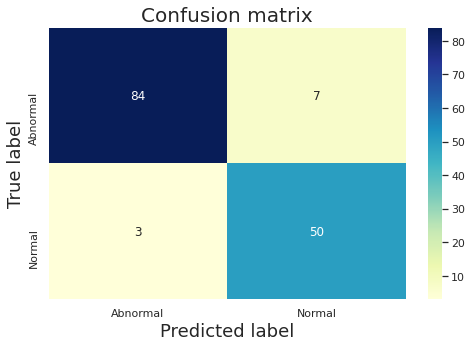

In [ ]:
#create CF 
data = {'Actual': act,'Predicted' : pred,}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act, pred)
TN, FP, FN, TP = confusion_matrix(act, pred).ravel()
print(TN, FP, FN, TP)
#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

In [ ]:
Case = TN+FP+FN+TP
print('Case Number = ', Case)

Case Number =  144
